# [fontainebleau 8](https://www.digitalrocksportal.org/projects/57/analysis_data/76/)


> * resolution 5.7 μm
> * porosity 8% 
> * size
> * voxel 480 * 480 * 480
> * image type 8-bit

In [1]:
side_len = 400 * 5.345 * 1e-6
side_len

0.0021379999999999997

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import scipy as sp
import openpnm as op
from pathlib import Path

# import PNM node and link file
# 4 files in a folder: *_link1.dat, *_link2.dat, *_node1.dat, *_node2.dat 
# ref to https://github.com/PMEAL/OpenPNM/blob/dev/examples/io_and_visualization/Statoil%20Import%20and%20Permeability%20Calculation.ipynb
path = Path(r'.\berea')

project = op.io.Statoil.load(path=path, prefix=r'Berea')
pn = project.network
pn.name = 'Berea'

print(pn)
pn.props()

#project.export_data(phases=[pn], filename=r'.cores\berea', filetype='vtp')

E:\program_files\anaconda\lib\site-packages\openpnm\io\Statoil.py:62: FutureWarning: read_table is deprecated, use read_csv instead.
  index_col=0)


――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
openpnm.network.GenericNetwork : Berea
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
#     Properties                                    Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
1     pore.area                                      6298 / 6298 
2     pore.clay_volume                               6298 / 6298 
3     pore.coords                                    6298 / 6298 
4     pore.radius                                    6298 / 6298 
5     pore.shape_factor                              6298 / 6298 
6     pore.volume                                    6298 / 6298 
7     throat.area                                   12098 / 12098
8     throat.clay_volume                            12098 / 12098
9     throat.conduit_lengths.pore1                  12098 / 12098
10    throat.conduit_lengths.pore2                  12098 / 12098

E:\program_files\anaconda\lib\site-packages\openpnm\io\Statoil.py:79: FutureWarning: read_table is deprecated, use read_csv instead.
  index_col=0)
E:\program_files\anaconda\lib\site-packages\openpnm\io\Statoil.py:120: FutureWarning: read_table is deprecated, use read_csv instead.
  index_col=0)


['pore.area', 'pore.clay_volume', 'pore.coords', 'pore.radius', 'pore.shape_factor', 'pore.volume', 'throat.area', 'throat.clay_volume', 'throat.conduit_lengths.pore1', 'throat.conduit_lengths.pore2', 'throat.conduit_lengths.throat', 'throat.conns', 'throat.length', 'throat.radius', 'throat.shape_factor', 'throat.total_length', 'throat.volume']

In [4]:
# network size
pn['pore.coords'][:,0].min()
pn['pore.coords'][:,0].max()

pn['pore.coords'][:,1].min()
pn['pore.coords'][:,1].max()

pn['pore.coords'][:,2].min()
pn['pore.coords'][:,2].max()

len_pnm = pn['pore.coords'][:,0].max() - pn['pore.coords'][:,0].min()
len_pnm

# porosity
len_pnm = pn['pore.coords'][:,0].max() - pn['pore.coords'][:,0].min()
v = (side_len ** 3)
p1 = (pn['pore.volume'].sum() + pn['throat.volume'].sum()) / v
p1

v = (len_pnm ** 3)
p2 = (pn['pore.volume'].sum() + pn['throat.volume'].sum()) / v
p2

# pore and throat size
pn['pore.diameter'] = 2 * pn['pore.radius']
pn['throat.diameter'] = 2 * pn['throat.radius']

pn['pore.diameter'].max()
pn['pore.diameter'].mean()
pn['pore.diameter'].min()

pn['throat.diameter'].max()
pn['throat.diameter'].mean()
pn['throat.diameter'].min()

5.345e-06

0.00212731

5.345e-06

0.00212731

5.345e-06

0.00212731

0.002121965

0.1959983913381542

0.20047534086948013

0.00014049073999999998

3.071342897395999e-05

4.548324e-06

8.012916e-05

1.4021849391866423e-05

1.0724299999999999e-06

In [5]:
# pore coordination number
import numpy as np

def pore_coordination_num(throats=pn['throat.conns'], pore_num=pn.Np):
    '''
    calculate pore coordination number
    parameters:
        throats=pn['throat.conns']: array,(pn.Nt, 2), throat with their connected pores;
        pore_num=pn.Np: nubmer of pores
    '''
    coordination = np.zeros(pn.Np)

    for throat in throats:
        coordination[throat[0]] += 1
        coordination[throat[1]] += 1
        
    return (coordination.astype(int))  

pn['pore.coordination_num'] = pore_coordination_num()
pn['pore.coordination_num'].min()
pn['pore.coordination_num'].max()

0

30

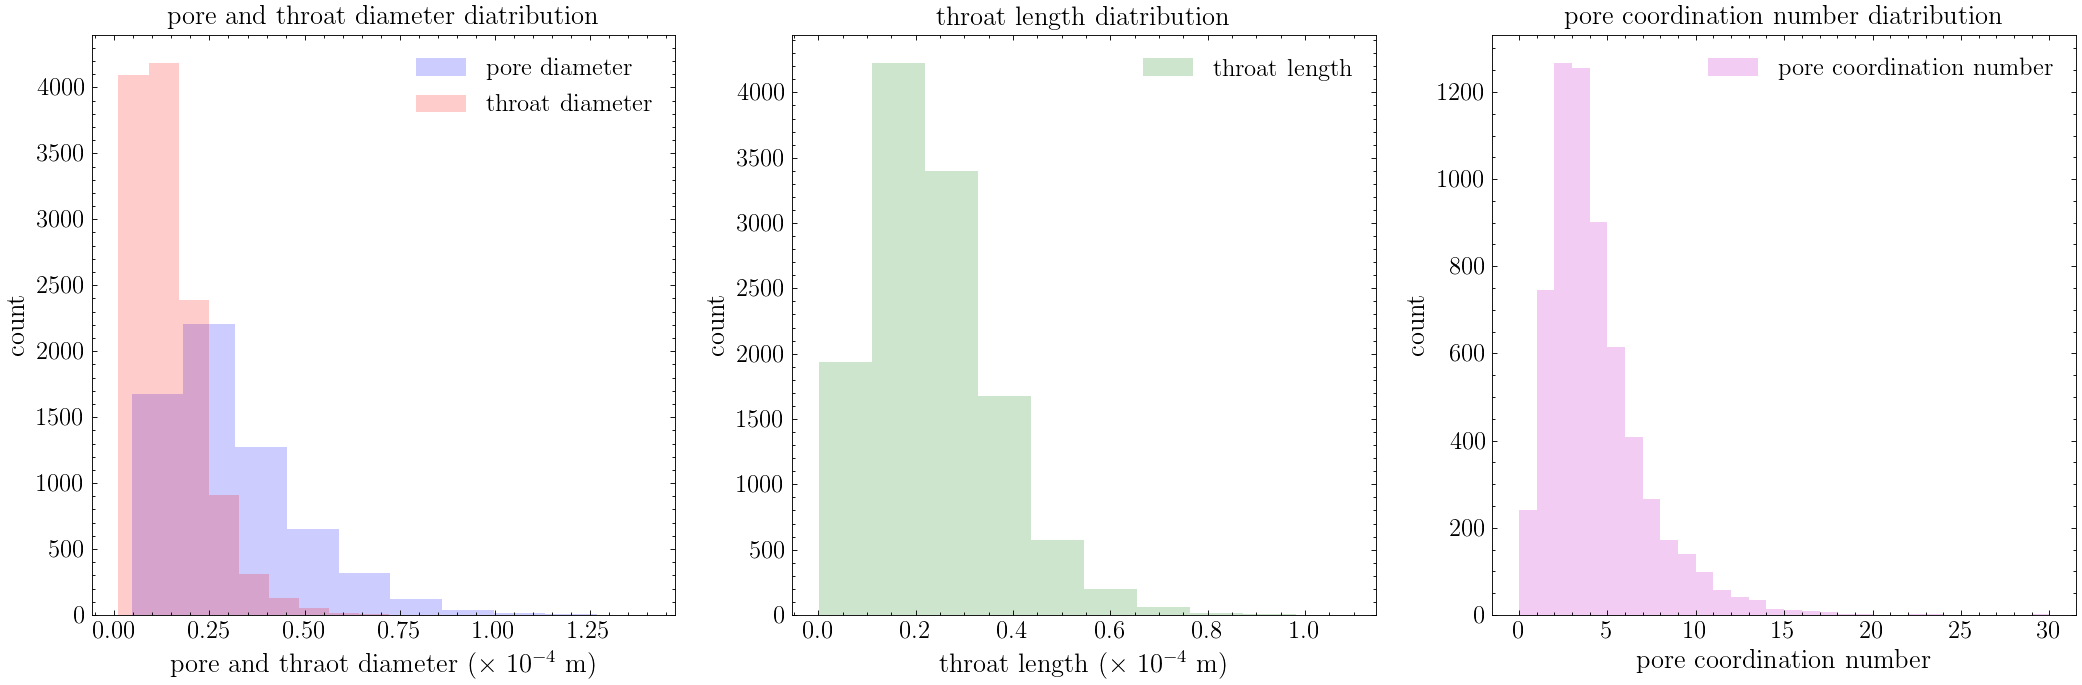

In [6]:
# plot
import matplotlib.pyplot as plt
plt.style.use(['science']) #  ref to https://github.com/garrettj403/SciencePlots for the style

f_name = r'.\cores\berea'
dia=pn['pore.diameter']
throat_dia=pn['throat.diameter']
throat_len=pn['throat.length']
coordina=pn['pore.coordination_num']

def pnm_statis(f_name, 
               dia=pn['pore.diameter'], 
               throat_dia=pn['throat.diameter'], 
               throat_len=pn['throat.length'], 
               coordina=pn['pore.coordination_num']): 
    '''
    draw statistical info, including pore and throat diameter, throat length, pore coordination number
    '''
    
    dia = dia * 1e4
    throat_dia = throat_dia * 1e4
    throat_len = throat_len * 1e4
    
    fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), dpi=128)

    # pore_diameter, throat_diameter
    s1 = ax1.hist(dia, density=False, histtype='stepfilled',
                  color='b', alpha=0.2, label='pore diameter ')
    s2 = ax1.hist(throat_dia, density=False,
                  histtype='stepfilled', color='r', alpha=0.2, label='throat diameter')

    # throat_length
    s3 = ax2.hist(throat_len, density=False,
                  histtype='stepfilled', color='g', alpha=0.2, label='throat length')

    # pore coordination number
    s4 = ax3.hist(coordina, bins=pn['pore.coordination_num'].max(),
                  density=False, histtype='stepfilled', color='m', alpha=0.2, label='pore coordination number')

    # ax1
    ax1.set_xlabel('pore and thraot diameter ($\\times$ 10$^{-4}$ m)', fontsize=15)
    ax1.set_ylabel('count', fontsize=15)
    ax1.set_title('pore and throat diameter diatribution', fontsize=15)
    ax1.tick_params(labelsize=14)
    ax1.legend(prop={'size': 14, }, loc='upper right')

    # ax2
    ax2.set_xlabel('throat length ($\\times$ 10$^{-4}$ m)', fontsize=15)
    ax2.set_ylabel('count', fontsize=15)
    ax2.set_title('throat length diatribution', fontsize=15)
    ax2.tick_params(labelsize=14)
    ax2.legend(prop={'size': 14, }, loc='upper right')

    # ax3
    ax3.set_xlabel('pore coordination number', fontsize=15)
    ax3.set_ylabel('count', fontsize=15)
    ax3.set_title('pore coordination number diatribution', fontsize=15)
    ax3.tick_params(labelsize=14)
    ax3.legend(prop={'size': 14, }, loc='upper right')
    ax3.set_xticks(np.arange(0, pn['pore.coordination_num'].max()+1), 2)
    #ax3.tick_params(axis='x', which='minor', reset=True, length=2)

    #plt.savefig(f_name+'.png')
    plt.show()
    

pnm_statis(f_name, 
           dia=pn['pore.diameter'], 
           throat_dia=pn['throat.diameter'], 
           throat_len=pn['throat.length'], 
           coordina=pn['pore.coordination_num'])

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
openpnm.network.GenericNetwork : Berea
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
#     Properties                                    Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
1     pore.area                                      6004 / 6004 
2     pore.clay_volume                               6004 / 6004 
3     pore.coordination_num                          6004 / 6004 
4     pore.coords                                    6004 / 6004 
5     pore.diameter                                  6004 / 6004 
6     pore.radius                                    6004 / 6004 
7     pore.shape_factor                              6004 / 6004 
8     pore.volume                                    6004 / 6004 
9     throat.area                                   12067 / 12067
10    throat.clay_volume                            12067 / 12067

0.00014049073999999998

3.149129145769487e-05

4.548324e-06

8.012916e-05

1.4037168603878346e-05

1.0724299999999999e-06

porosity: 


0.1953048913336655

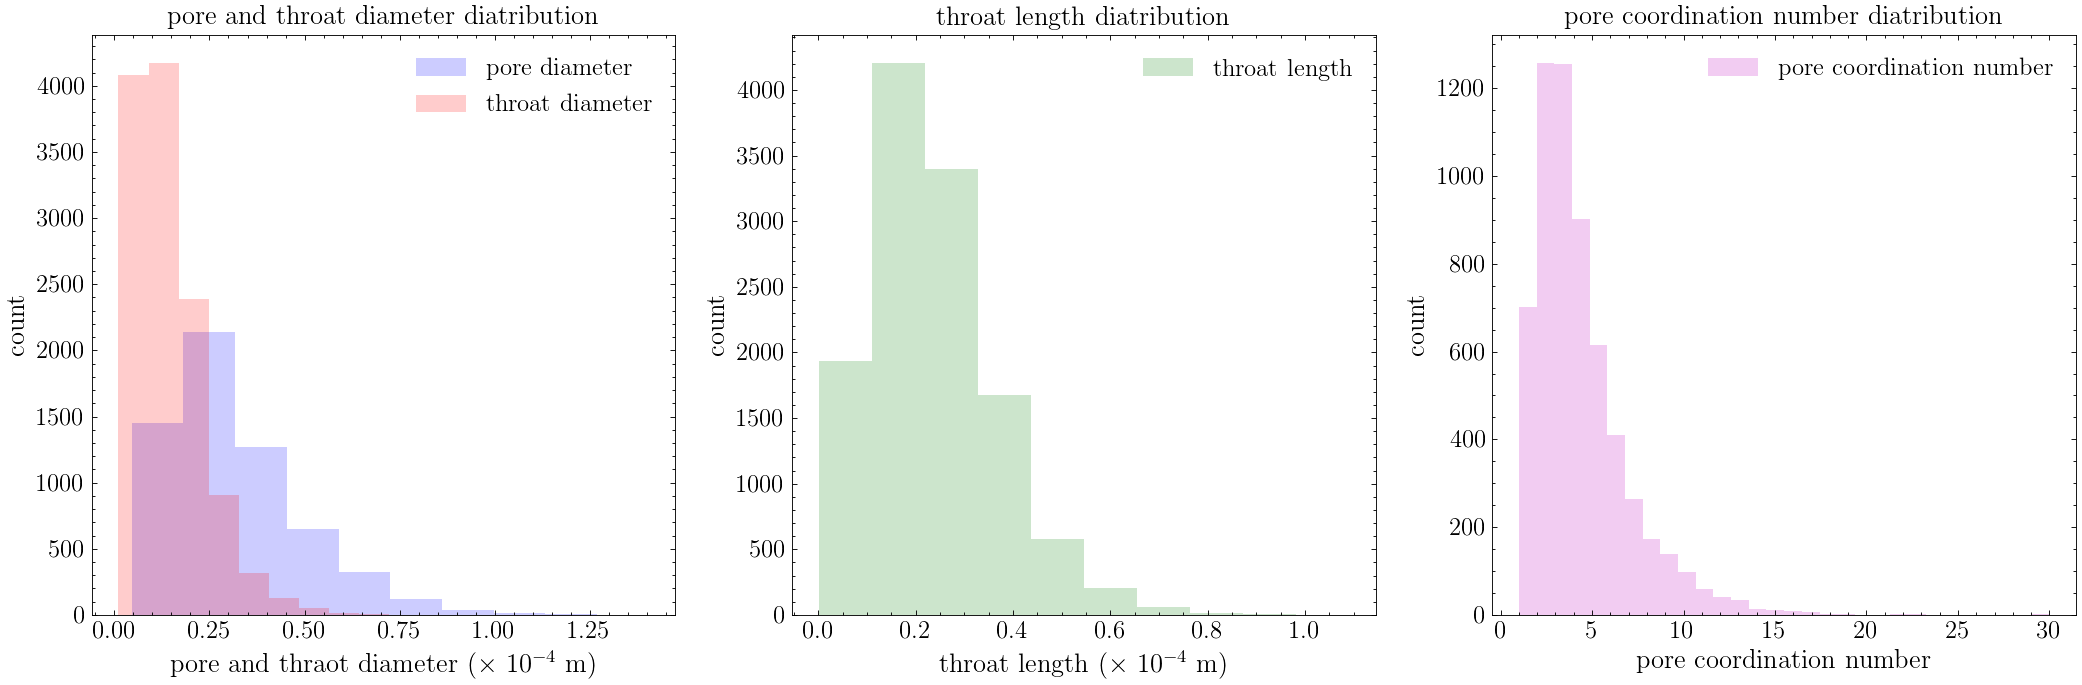

―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
    SOURCE: openpnm.algorithms.GenericTransport._get_domain_area 
    TIME STAMP: 2020-09-14 11:17:57,811    
―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
    ERROR: Detected inlet pores are not coplanar 
    SOURCE: openpnm.algorithms.GenericTransport._get_domain_area 
    TIME STAMP: 2020-09-14 11:17:57,812    
―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
    ERROR: Detected outlet pores are not coplanar 
    SOURCE: openpnm.algorithms.GenericTransport._get_domain_area 
    TIME STAMP: 2020-09-14 11:17:57,813    
―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
    SOURCE: openpnm.algorithms.GenericTransport._get_domain_area 
    TIME STAMP: 2020-09-14 11:17:57,814    
―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
    SOURCE: openpnm.algorithms.GenericTransport._get_domain_area 
    TIME STAMP: 2020-09-14 11:17:

{'Q': array([6.22057085e-07]), 'K_op1': array([2.15521891e-08]), 'K_op2': array([2.59876406e-12]), 'Porosity': 0.1953048913336655}


In [7]:
# trimming process
net_health = pn.check_network_health()
op.topotools.trim(network=pn, pores=net_health["trim_pores"])
print(pn)

# re calculate pore and throat size
print('pore and throat size: ')
pn['pore.diameter'].max()
pn['pore.diameter'].mean()
pn['pore.diameter'].min()

pn['throat.diameter'].max()
pn['throat.diameter'].mean()
pn['throat.diameter'].min()

print('porosity: ')

# re calculate porosity
v = (side_len ** 3)
p1 = (pn['pore.volume'].sum() + pn['throat.volume'].sum()) / v
p1

f_name = 'fonta_trim'
pnm_statis(f_name, 
           dia=pn['pore.diameter'], 
           throat_dia=pn['throat.diameter'], 
           throat_len=pn['throat.length'], 
           coordina=pn['pore.coordination_num'])

# phase
water = op.phases.Water(network=pn)

water.add_model(propname='throat.hydraulic_conductance',
                model=op.models.physics.hydraulic_conductance.hagen_poiseuille)

# stokes flow algorithm
flow = op.algorithms.StokesFlow(network=pn, phase=water)
flow.set_value_BC(pores=pn['pore.inlets'], values=200000)
flow.set_value_BC(pores=pn['pore.outlets'], values=100000)
flow.setup(phase= water, quantity='pore.pressure', conductance='throat.hydraulic_conductance')
flow.run()


Q1 = flow.rate(pores=pn['pore.inlets'])
Q2 = flow.rate(pores=pn['pore.outlets'])

K_op1 = flow.calc_effective_permeability(inlets=pn['pore.inlets'], outlets=pn['pore.outlets'])
K_op2 = flow.calc_effective_permeability(inlets=pn['pore.inlets'], outlets=pn['pore.outlets'],
                                    domain_area=side_len**2, domain_length=side_len)

check = {'Q': Q1,
         'K_op1': K_op1,
         'K_op2': K_op2,
         'Porosity': p1}

print(check)

#project.export_data(phases=[flow], filename=r'.cores\fonta_water', filetype='vtp')